                     Model  Train Accuracy  Test Accuracy
0     Decision Tree (full)        1.000000            1.0
1  Pruned Tree (α=0.00000)        1.000000            1.0
2            Random Forest        1.000000            1.0
3        AdaBoost (stumps)        0.942857            1.0


c:\Users\anujt_3nxzaxy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


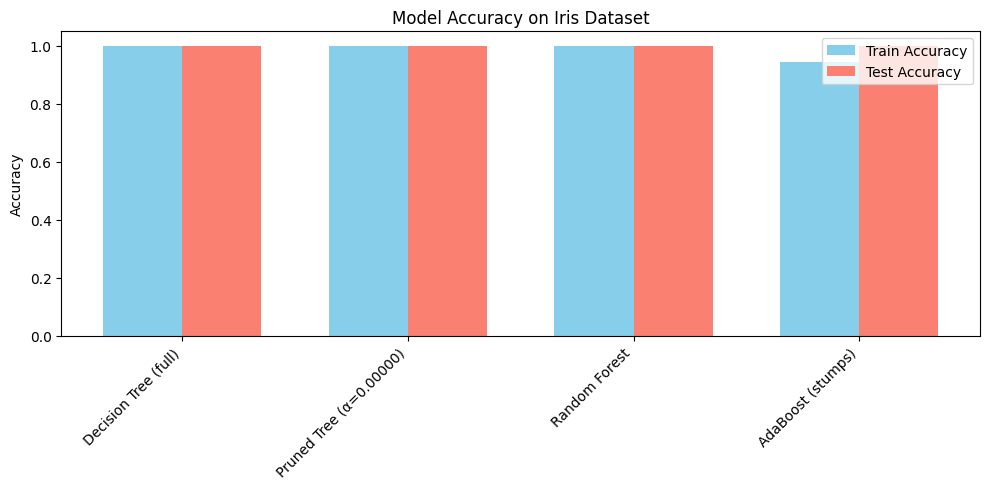

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load and split dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree (full)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
acc_train_dt = accuracy_score(y_train, dt.predict(X_train))
acc_test_dt = accuracy_score(y_test, dt.predict(X_test))

# Cost Complexity Pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
test_accs = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

best_alpha = ccp_alphas[np.argmax(test_accs)]
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)
acc_train_pruned = accuracy_score(y_train, dt_pruned.predict(X_train))
acc_test_pruned = accuracy_score(y_test, dt_pruned.predict(X_test))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
acc_train_rf = accuracy_score(y_train, rf.predict(X_train))
acc_test_rf = accuracy_score(y_test, rf.predict(X_test))

# AdaBoost with Decision Stumps
# AdaBoost with Decision Stumps
# If scikit-learn version is less than 0.21, use 'estimator' instead of 'base_estimator'
adb = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # Modified: estimator instead of base_estimator
    n_estimators=50,
    random_state=42
)
adb.fit(X_train, y_train)
acc_train_adb = accuracy_score(y_train, adb.predict(X_train))
acc_test_adb = accuracy_score(y_test, adb.predict(X_test))

# Results table
models = [
    "Decision Tree (full)",
    f"Pruned Tree (α={best_alpha:.5f})",
    "Random Forest",
    "AdaBoost (stumps)"
]

train_acc = [acc_train_dt, acc_train_pruned, acc_train_rf, acc_train_adb]
test_acc = [acc_test_dt, acc_test_pruned, acc_test_rf, acc_test_adb]

# Print results as DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
})
print(results_df)

# Plotting
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Iris Dataset')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\anujt_3nxzaxy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Model  Train Accuracy  Test Accuracy
0     Decision Tree (full)         1.00000       0.941520
1  Pruned Tree (α=0.00491)         0.98995       0.964912
2            Random Forest         1.00000       0.970760
3        AdaBoost (stumps)         1.00000       0.976608


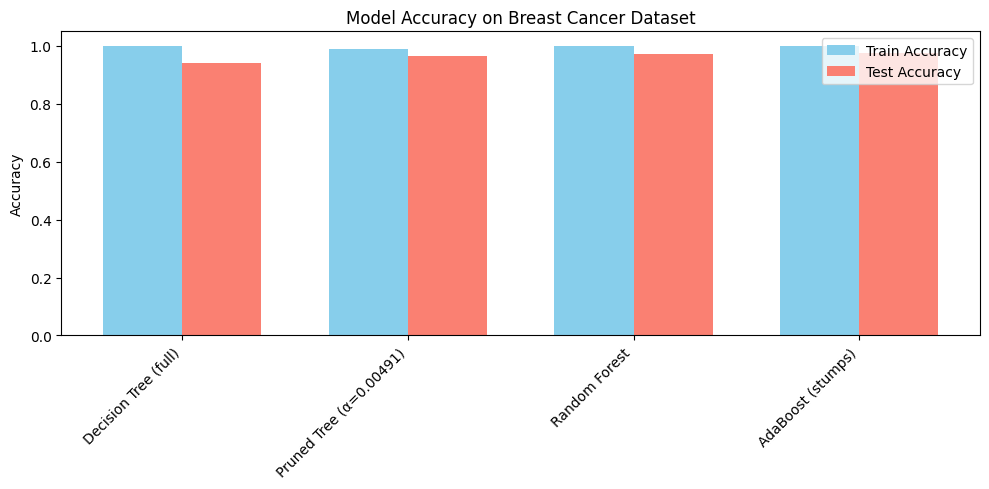

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load and split Breast Cancer dataset (better for showing overfitting)
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree (full)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
acc_train_dt = accuracy_score(y_train, dt.predict(X_train))
acc_test_dt = accuracy_score(y_test, dt.predict(X_test))

# Cost Complexity Pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
test_accs = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

best_alpha = ccp_alphas[np.argmax(test_accs)]
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)
acc_train_pruned = accuracy_score(y_train, dt_pruned.predict(X_train))
acc_test_pruned = accuracy_score(y_test, dt_pruned.predict(X_test))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
acc_train_rf = accuracy_score(y_train, rf.predict(X_train))
acc_test_rf = accuracy_score(y_test, rf.predict(X_test))

# AdaBoost with Decision Stumps
adb = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
adb.fit(X_train, y_train)
acc_train_adb = accuracy_score(y_train, adb.predict(X_train))
acc_test_adb = accuracy_score(y_test, adb.predict(X_test))

# Results table
models = [
    "Decision Tree (full)",
    f"Pruned Tree (α={best_alpha:.5f})",
    "Random Forest",
    "AdaBoost (stumps)"
]

train_acc = [acc_train_dt, acc_train_pruned, acc_train_rf, acc_train_adb]
test_acc = [acc_test_dt, acc_test_pruned, acc_test_rf, acc_test_adb]

# Print results as DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
})
print(results_df)

# Plotting
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Breast Cancer Dataset')
plt.legend()
plt.tight_layout()
plt.show()
